# <font color = 'orange'> Train Model

---

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from LearningAlgorithms import ClassificationAlgorithms
import seaborn as sns
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Plot settings
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

In [3]:
df = pd.read_pickle('../../data/interim/03_data_features.pkl')

df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.184333,0.991333,-0.190667,-28.4268,-13.0854,25.2684,B,bench,heavy,30,...,0.600298,245.584138,-48.335782,16.723521,22.887133,-16.462033,13.505075,-90.019558,3.101760,1
2019-01-11 15:08:08.400,-0.011000,0.850667,-0.094333,12.0852,-0.3536,-5.4024,B,bench,heavy,30,...,0.277713,289.009998,-39.531353,-29.027394,-41.172091,-2.880020,5.499492,-21.546180,6.177948,1
2019-01-11 15:08:08.800,-0.065000,0.955333,-0.025333,1.2684,-3.0246,-1.2318,B,bench,heavy,30,...,0.540112,286.688181,-50.110861,-55.030849,2.663819,-12.836489,-45.736718,57.967366,-5.583470,1
2019-01-11 15:08:09.200,-0.040667,0.990000,-0.034000,2.8538,-2.9390,1.8656,B,bench,heavy,30,...,0.476851,283.912877,-28.514942,38.213692,33.033641,23.097709,34.991662,52.306514,-21.177484,1
2019-01-11 15:08:09.600,-0.054000,0.946333,-0.068000,2.1586,2.7194,-3.8658,B,bench,heavy,30,...,0.590682,230.374271,-26.239333,38.922872,-34.668524,1.381463,34.560586,-24.313563,-49.567671,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.000,0.023333,-0.483667,0.200000,-8.7926,9.3658,0.1342,E,row,medium,90,...,0.482764,347.170845,-17.559995,-55.354330,-91.103222,16.167516,48.095862,-25.078565,5.347692,4
2019-01-20 17:33:26.400,0.001667,-1.267667,-0.078667,-29.7804,4.6464,18.9510,E,row,medium,90,...,0.448131,412.697542,61.755348,-24.017146,77.520934,-46.187130,-64.070276,-21.072239,10.783815,0
2019-01-20 17:33:26.800,-0.032333,-1.001000,-0.074667,4.4754,-3.4146,1.8780,E,row,medium,90,...,0.429302,347.669692,-16.842251,-22.177096,-75.996897,64.861537,22.968427,21.862325,22.009788,0


---

### Create a training and test set

In [4]:
df = df.drop(columns = ['participant', 'set', 'category'])

# separating independent and dependent feature
x = df.drop(columns = ['label'])
y = df['label']

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)


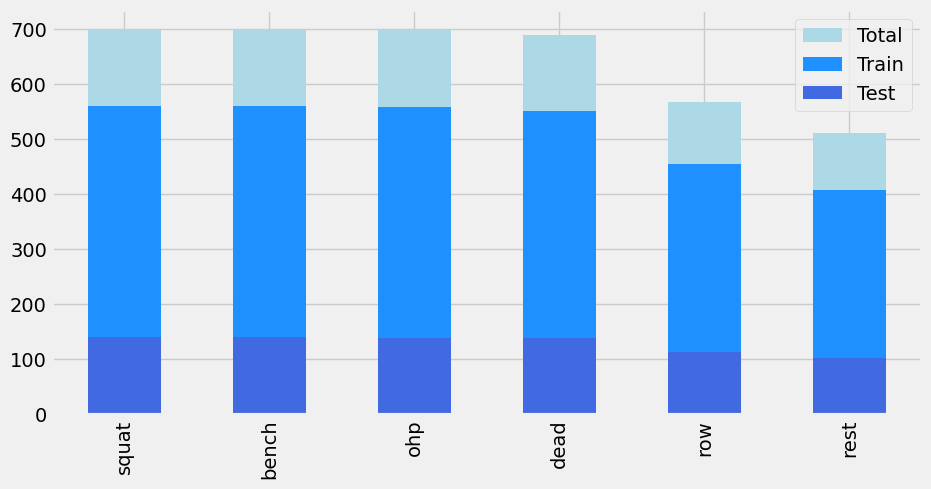

In [5]:
# let's see some visualization
fig, ax = plt.subplots(figsize = (10, 5))
df['label'].value_counts().plot(kind = 'bar', ax = ax, color = 'lightblue', label = 'Total')
y_train.value_counts().plot(kind = 'bar', ax = ax, color = 'dodgerblue', label = 'Train')
y_test.value_counts().plot(kind = 'bar', ax = ax, color = 'royalblue', label = 'Test')
plt.legend()
plt.show()

---

### Split feature subsets

In [7]:
list(df.columns)

['acc_x',
 'acc_y',
 'acc_z',
 'gyr_x',
 'gyr_y',
 'gyr_z',
 'label',
 'duration',
 'pca_1',
 'pca_2',
 'pca_3',
 'acc_r',
 'gyr_r',
 'acc_x_temp_mean_ws_5',
 'acc_x_temp_std_ws_5',
 'acc_y_temp_mean_ws_5',
 'acc_y_temp_std_ws_5',
 'acc_z_temp_mean_ws_5',
 'acc_z_temp_std_ws_5',
 'gyr_x_temp_mean_ws_5',
 'gyr_x_temp_std_ws_5',
 'gyr_y_temp_mean_ws_5',
 'gyr_y_temp_std_ws_5',
 'gyr_z_temp_mean_ws_5',
 'gyr_z_temp_std_ws_5',
 'acc_r_temp_mean_ws_5',
 'acc_r_temp_std_ws_5',
 'gyr_r_temp_mean_ws_5',
 'gyr_r_temp_std_ws_5',
 'acc_y_max_freq',
 'acc_y_freq_weighted',
 'acc_y_pse',
 'acc_y_freq_0.0_Hz_ws_14',
 'acc_y_freq_0.357_Hz_ws_14',
 'acc_y_freq_0.714_Hz_ws_14',
 'acc_y_freq_1.071_Hz_ws_14',
 'acc_y_freq_1.429_Hz_ws_14',
 'acc_y_freq_1.786_Hz_ws_14',
 'acc_y_freq_2.143_Hz_ws_14',
 'acc_y_freq_2.5_Hz_ws_14',
 'acc_x_max_freq',
 'acc_x_freq_weighted',
 'acc_x_pse',
 'acc_x_freq_0.0_Hz_ws_14',
 'acc_x_freq_0.357_Hz_ws_14',
 'acc_x_freq_0.714_Hz_ws_14',
 'acc_x_freq_1.071_Hz_ws_14',
 'acc_x

In [6]:
basic_features = ['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z']
square_features = ['acc_r', 'gyr_r']
pca_features = ['pca_1', 'pca_2', 'pca_3']
time_features = [f for f in df.columns if '_temp_' in f]
freq_features = [f for f in df.columns if ('_freq' in f) or ('_pse' in f)]
cluster_features = ['cluster']

print(f'Basic features : {len(basic_features)}')
print(f'Square features : {len(square_features)}')
print(f'Pca features : {len(pca_features)}')
print(f'Time features : {len(time_features)}')
print(f'Frequency features : {len(freq_features)}')
print(f'Cluster feature : {len(cluster_features)}')

feature_set_1 = list(set(basic_features))
feature_set_2 = list(set(basic_features + square_features + pca_features))
feature_set_3 = list(set(feature_set_2 + time_features))
feature_set_4 = list(set(feature_set_3 + freq_features + cluster_features))

Basic features : 6
Square features : 2
Pca features : 3
Time features : 16
Frequency features : 88
Cluster feature : 1


---

### Perform forward feature selection using simple decision tree

In [8]:
learner = ClassificationAlgorithms()

max_features = 10 
selected_frequency, ordered_frequency, ordered_scores = learner.forward_selection(
    max_features, x_train, y_train
)

0
1
2
3
4
5
6
7
8
9


In [9]:
selected_frequency

['acc_x_freq_0.0_Hz_ws_14',
 'duration',
 'acc_y_freq_0.0_Hz_ws_14',
 'acc_z_temp_mean_ws_5',
 'acc_x_max_freq',
 'gyr_r_freq_1.429_Hz_ws_14',
 'pca_1',
 'acc_z',
 'gyr_r_freq_weighted',
 'acc_y_freq_1.429_Hz_ws_14']

In [ ]:
# let's store the features to avoid running again when the kernel is crashed
selected_features = [
    'acc_x_freq_0.0_Hz_ws_14',
    'duration',
    'acc_y_freq_0.0_Hz_ws_14',
    'acc_z_temp_mean_ws_5',
    'acc_x_max_freq',
    'gyr_r_freq_1.429_Hz_ws_14',
    'pca_1',
    'acc_z',
    'gyr_r_freq_weighted',
    'acc_y_freq_1.429_Hz_ws_14'
 ]

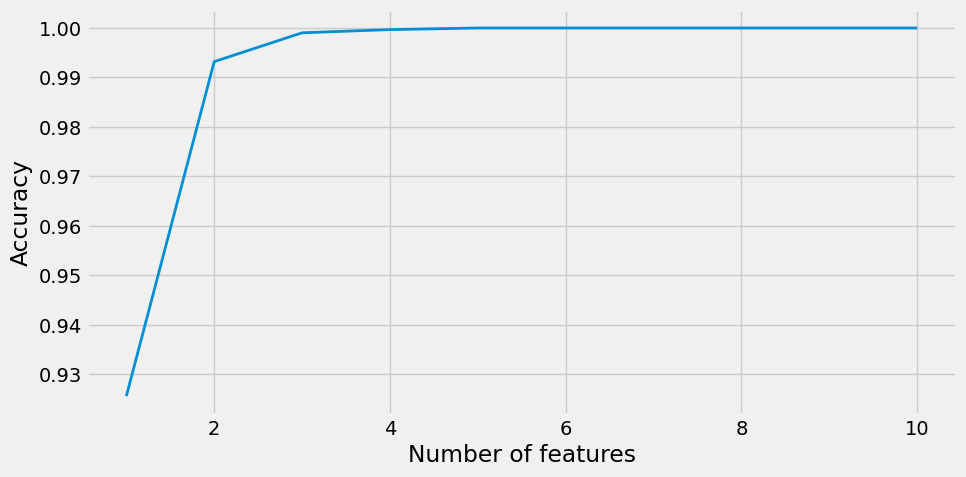

In [10]:
# visualize the accuracy of the model with respect to number of features 
plt.figure(figsize = (10, 5))
plt.plot(np.arange(1, max_features+1, 1), ordered_scores)
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.show()

---

### Grid search for best hyperparameters and model selection

    1. Neural Network.
    2. Random Forest.
    3. KNN.
    4. Decision Tree.
    5. Naive Bayes.

In [11]:
possible_feature_sets = [
    feature_set_1,
    feature_set_2,
    feature_set_3, 
    feature_set_4,
    selected_frequency
]

feature_names = [
    'Feature Set 1',
    'Feature Set 2',
    'Feature Set 3',
    'Feature Set 4',
    'Selected Feature'
]

In [12]:
iterations = 1
score_df = pd.DataFrame()

for i, f in zip(range(len(possible_feature_sets)), feature_names):
    print("Feature set:", i)
    selected_train_x = x_train[possible_feature_sets[i]]
    selected_test_x = x_test[possible_feature_sets[i]]

    # First run non deterministic classifiers to average their score.
    performance_test_nn = 0
    performance_test_rf = 0

    for it in range(0, iterations):
        print("\tTraining neural network,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.feedforward_neural_network(
            selected_train_x,
            y_train,
            selected_test_x,
            gridsearch=False,
        )
        performance_test_nn += accuracy_score(y_test, class_test_y)

        print("\tTraining random forest,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(
            selected_train_x, y_train, selected_test_x, gridsearch=True
        )
        performance_test_rf += accuracy_score(y_test, class_test_y)

    performance_test_nn = performance_test_nn / iterations
    performance_test_rf = performance_test_rf / iterations

    # And we run our deterministic classifiers:
    print("\tTraining KNN")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.k_nearest_neighbor(
        selected_train_x, y_train, selected_test_x, gridsearch=True
    )
    performance_test_knn = accuracy_score(y_test, class_test_y)

    print("\tTraining decision tree")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.decision_tree(
        selected_train_x, y_train, selected_test_x, gridsearch=True
    )
    performance_test_dt = accuracy_score(y_test, class_test_y)

    print("\tTraining naive bayes")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.naive_bayes(selected_train_x, y_train, selected_test_x)

    performance_test_nb = accuracy_score(y_test, class_test_y)

    # Save results to dataframe
    models = ["NN", "RF", "KNN", "DT", "NB"]
    new_scores = pd.DataFrame(
        {
            "model": models,
            "feature_set": f,
            "accuracy": [
                performance_test_nn,
                performance_test_rf,
                performance_test_knn,
                performance_test_dt,
                performance_test_nb,
            ],
        }
    )
    score_df = pd.concat([score_df, new_scores])

Feature set: 0
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 1
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 2
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 3
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 4
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes


In [13]:
score_df

,model,feature_set,accuracy
0,NN,Feature Set 1,0.919793
1,RF,Feature Set 1,0.950841
2,KNN,Feature Set 1,0.777490
3,DT,Feature Set 1,0.913325
4,NB,Feature Set 1,0.815006
0,NN,Feature Set 2,0.924968
1,RF,Feature Set 2,0.952135
2,KNN,Feature Set 2,0.768435
3,DT,Feature Set 2,0.917206
4,NB,Feature Set 2,0.798189


---

### Create a grouped bar plot to compare the results

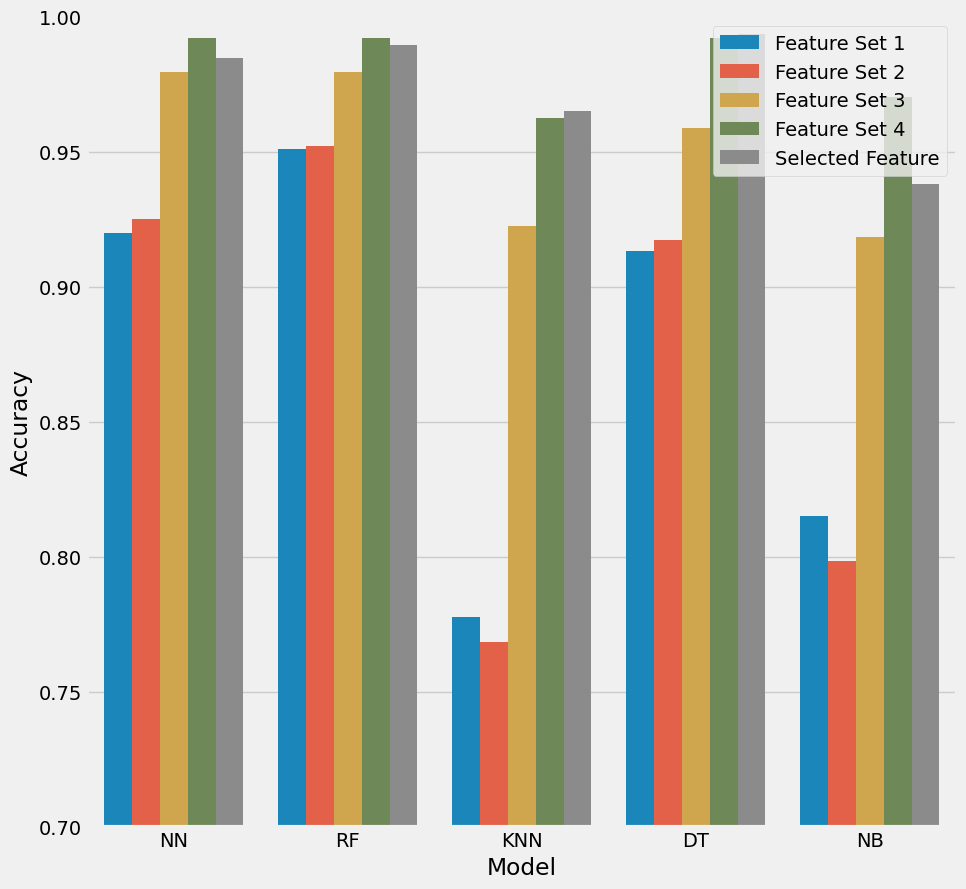

In [14]:
score_df.sort_values(by = 'accuracy', ascending = False)

# let's visualize the accuracy of models
plt.figure(figsize = (10, 10))
sns.barplot(x = 'model', y = 'accuracy', hue = 'feature_set', data = score_df)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1)
plt.legend()
plt.show()

---

### Select best model and evaluate results

In [15]:
class_train_y, class_test_y, class_train_prob_y, class_test_prob_y  = learner.random_forest(x_train[feature_set_4], y_train, x_test[feature_set_4], gridsearch = True)

In [16]:
accuracy_score = accuracy_score(y_test, class_test_y)

accuracy_score

0.9961190168175937

In [17]:
classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y, labels = classes)

cm

array([[139,   0,   1,   0,   0,   0],
       [  0, 138,   0,   0,   0,   0],
       [  2,   0, 137,   0,   0,   0],
       [  0,   0,   0, 102,   0,   0],
       [  0,   0,   0,   0, 114,   0],
       [  0,   0,   0,   0,   0, 140]], dtype=int64)

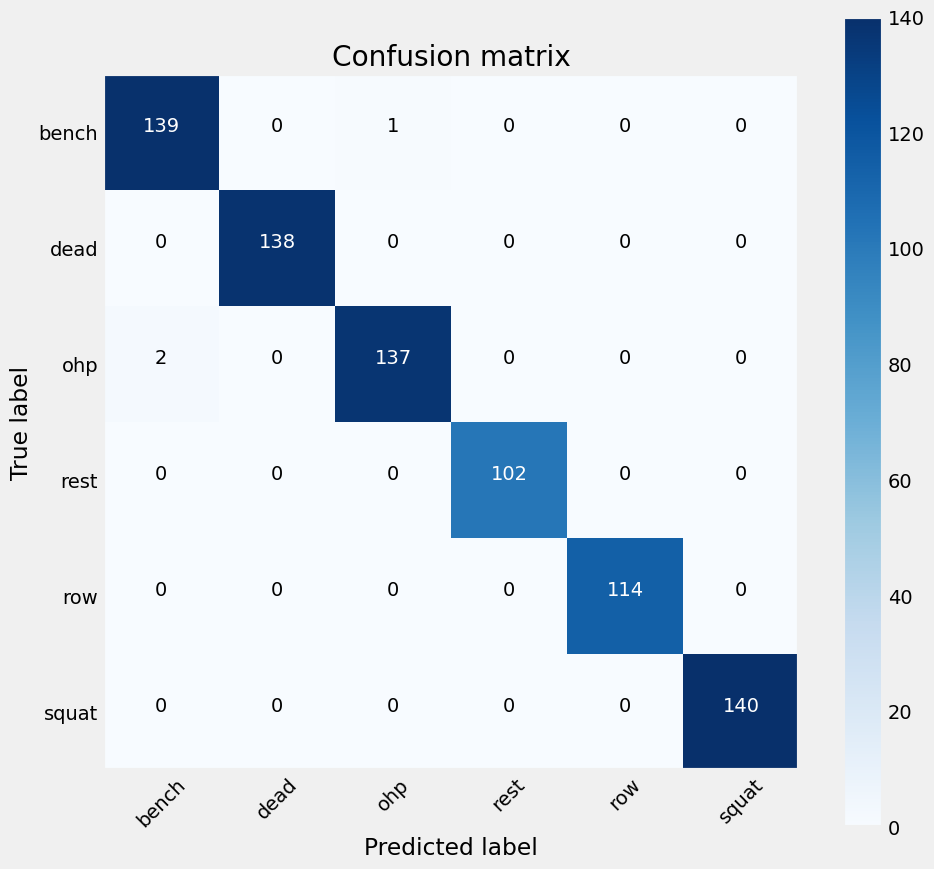

In [18]:
# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

---

### Select train and test data based on participant

In [19]:
df = pd.read_pickle('../../data/interim/03_data_features.pkl')

participant_df = df.drop(columns = ['set', 'category'], axis = 1)

x_train = participant_df[participant_df['participant'] != 'A'].drop('label', axis = 1)
x_train = x_train.drop(['participant'], axis = 1)
x_test = participant_df[participant_df['participant'] == 'A'].drop('label', axis = 1)
x_test = x_test.drop(['participant'], axis = 1)

y_train = participant_df[participant_df['participant'] != 'A']['label']
y_test = participant_df[participant_df['participant'] == 'A']['label']

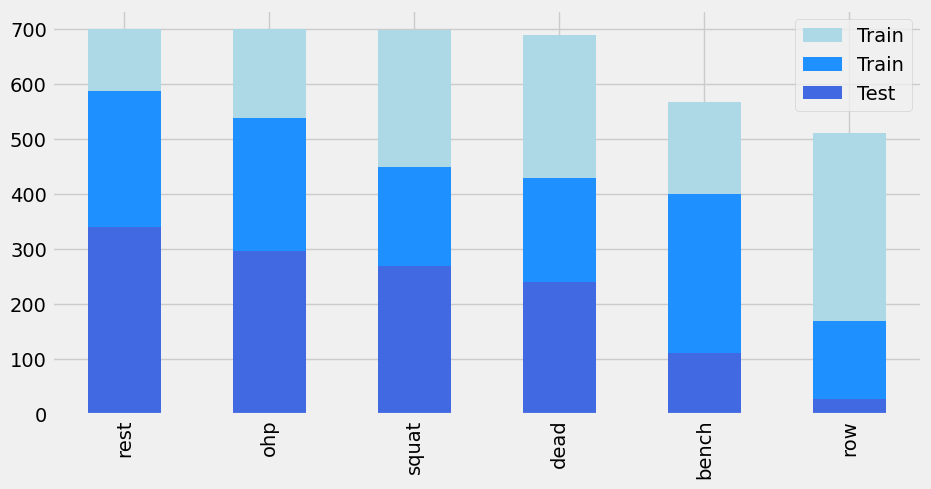

In [20]:
# let's visualize the distribution of the split
fig, ax = plt.subplots(figsize = (10, 5))
df['label'].value_counts().plot(
    kind = 'bar', ax = ax, color = 'lightblue', label = 'Train'
)
y_train.value_counts().plot(kind = 'bar', ax = ax, color = 'dodgerblue', label = 'Train')
y_test.value_counts().plot(kind = 'bar', ax = ax, color = 'royalblue', label = 'Test')
plt.legend()
plt.show()

---

### Use best model again and evaluate results

In [21]:
class_train_y, class_test_y, class_train_prob_y, class_test_prob_y  = learner.random_forest(x_train[feature_set_4], y_train, x_test[feature_set_4], gridsearch = True)

In [24]:
classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y, labels = classes)

cm

array([[111,   0,   0,   0,   0,   0],
       [  0, 240,   0,   0,   0,   0],
       [ 10,   0, 287,   0,   0,   0],
       [  0,   0,   0, 340,   0,   0],
       [  0,   0,   0,   0,  29,   0],
       [  0,   0,   0,   0,   0, 270]], dtype=int64)

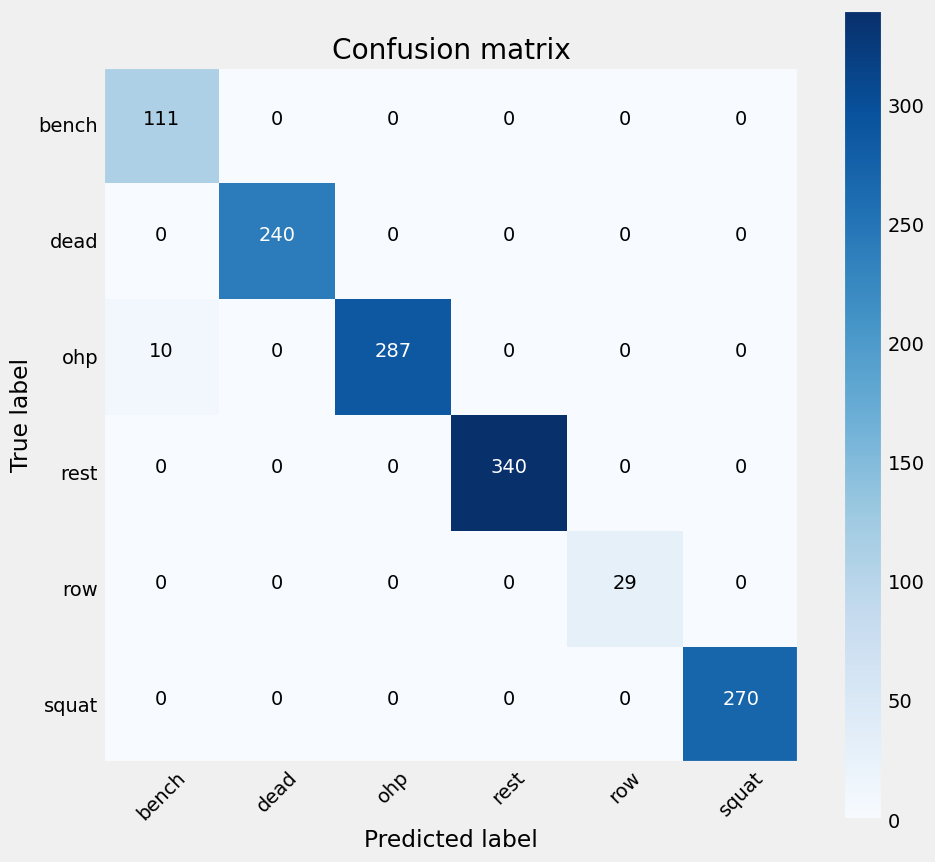

In [25]:
# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

---

### Try with more complex model with the selected features

In [26]:
class_train_y, class_test_y, class_train_prob_y, class_test_prob_y  = learner.feedforward_neural_network(x_train[selected_frequency], y_train, x_test[selected_frequency], gridsearch = True)

e:\PW Skills - Data Science\04_Machine_Learning\Week_ML_Projects\04_Fitness_Tracker\tracking-barbell-exercises\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\PW Skills - Data Science\04_Machine_Learning\Week_ML_Projects\04_Fitness_Tracker\tracking-barbell-exercises\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\PW Skills - Data Science\04_Machine_Learning\Week_ML_Projects\04_Fitness_Tracker\tracking-barbell-exercises\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\PW Skills - Data Science\04_Machine_Lear

In [28]:
classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y, labels = classes)

cm

array([[111,   0,   0,   0,   0,   0],
       [  0, 230,   0,   0,  10,   0],
       [ 33,   0, 264,   0,   0,   0],
       [  0,   0,   0, 340,   0,   0],
       [  0,   0,   0,   0,  29,   0],
       [  0,   0,   0,   0,   0, 270]], dtype=int64)

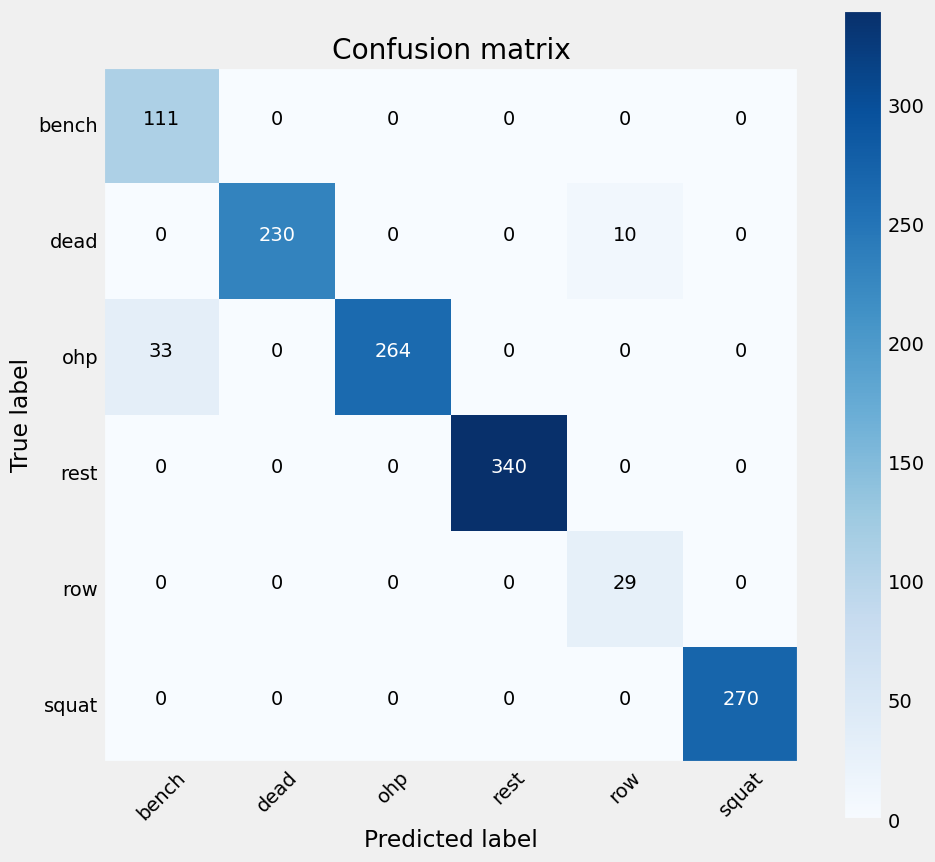

In [29]:
# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

---